In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import discPicker

In [2]:
with nc.Dataset("../sample_data/temps.nc", 'r') as h:
    print("Dimensions:")
    for d in h.dimensions:
        print("  {:>9}: {}".format(d, h[d].size))
    print()
    print("Variables:")
    for v in h.variables:
        print("  {:>9}: {}, {}".format(v, h[v].dimensions, "[{}]".format(h[v].units)))

Dimensions:
  longitude: 321
   latitude: 121
       time: 744

Variables:
  longitude: ('longitude',), [degrees_east]
   latitude: ('latitude',), [degrees_north]
       time: ('time',), [hours since 1900-01-01 00:00:00.0]
        t2m: ('time', 'latitude', 'longitude'), [K]


# Loading data

In [3]:
with nc.Dataset("../sample_data/temps.nc", 'r') as h:
    time = h['time'][:]
    t2m = h['t2m'][:]
    
    lon = h['longitude'][:]
    lat = h['latitude'][:]

# Preparing the "Disc Picker"

In [18]:
DP = discPicker.DiscPicker(
    max_radius=20, # Large max_radius will require more memory (not that it's very big though...)
    dxdy=(lon[1]-lon[0], lat[1]-lat[0]), # The discPicker expects data on a structured grid with resolution (dx,dy)
    x0y0=(lon[0],lat[0]) # If the structured grid has an offset, give the coordinates at pixel-(0,0)
)

### Plotting a snapshot with a circle on top
This cell doesn't use the discPicker, it just shows what circle we are going to pick

(-45.0, 35.0, -5.0, 25.0)

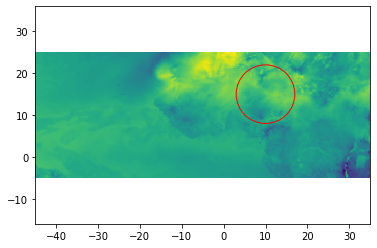

In [19]:
ti = 100

xy = (10,15)
rad = 7

im = np.copy(t2m[ti].T)

plt.pcolormesh(lon, lat, im.T)
plt.gca().add_patch(
    plt.Circle(xy, radius=rad,fc='none',ec='red')
)

plt.axis('equal')


# Reduce the values inside the circle by a factor 0.9

(-45.0, 35.0, -5.0, 25.0)

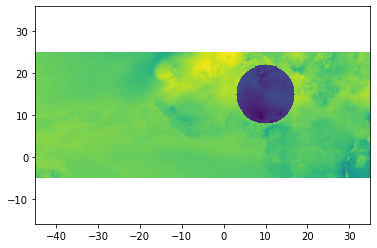

In [25]:
im = np.copy(t2m[ti]).T
pxls = DP.discPxls( xy, rad, im)
im[pxls] *= 0.9
plt.pcolormesh(lon,lat,im.T)

plt.axis('equal')

# Set all values in the circle to the mean value of those pixels

(-45.0, 35.0, -5.0, 25.0)

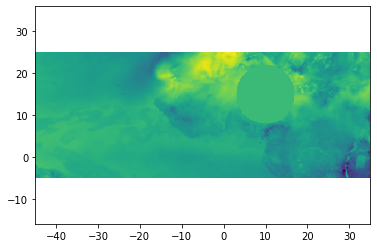

In [26]:
im = np.copy(t2m[ti]).T
pxls = DP.discPxls( xy, rad, im)
im[pxls] = im[pxls].mean()
plt.pcolormesh(lon,lat,im.T)

plt.axis('equal')

# Set all values in the circle to the mean value the entire domain

(-45.0, 35.0, -5.0, 25.0)

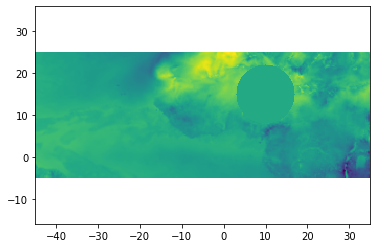

In [27]:
im = np.copy(t2m[ti]).T
pxls = DP.discPxls( xy, rad, im)
im[pxls] = im.mean()
plt.pcolormesh(lon,lat,im.T)

plt.axis('equal')

# Notice that the DiscPicker uses periodic boundary conditions:

(-45.0, 35.0, -5.0, 29.65)

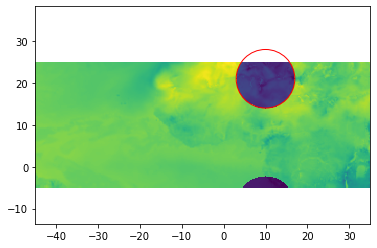

In [32]:
xy = (10,21)
rad = 7

im = np.copy(t2m[ti]).T
pxls = DP.discPxls( xy, rad, im)
im[pxls] *= 0.9
plt.pcolormesh(lon,lat,im.T)

plt.pcolormesh(lon, lat, im.T)
plt.gca().add_patch(
    plt.Circle(xy, radius=rad,fc='none',ec='red')
)

plt.axis('equal')